# Sentiment

In [9]:
SENTIMENT_RESULTS_PATH = 'data/sentiment/res_sentiment_sample_u500_mi1ma10.json'

In [6]:
import json
from typing import Union

def load_json_results(filename: str) -> Union[dict, list]:
    with open(filename, "r", encoding="utf-8") as f:
        return json.load(f)

In [7]:
import pandas as pd

def load_sentiment() -> pd.DataFrame:

    data = []
    sentiment_results = load_json_results(SENTIMENT_RESULTS_PATH)
    for item in sentiment_results:
        if "error" in item["sentiment"][0]:
            continue
        sentiment_results = item["sentiment"][0]
        current_row = {
            "tweet_id": item["tweet_id"],
            "text": item["text"],
            "user": item["user"],
            "positive": sentiment_results["positive"],
            "negative": sentiment_results["negative"],
            "neutral": sentiment_results["neutral"],
            "group": item["rank"],
        }
        data.append(current_row)

    df = pd.DataFrame.from_dict(data)
    return df

In [10]:
df_loaded = load_sentiment()
df = df_loaded.copy()
df["community"] = df["group"].apply(lambda x: x.split("_")[0])
df["mention_type"] = df["group"].apply(lambda x: x.split("_")[1])
df.head()

,tweet_id,text,user,positive,negative,neutral,group,community,mention_type
0,1329873353906286593,🇺🇸⚔️Deras RED FRIDAY Warriors🇺🇸⚔️5⃣\n@tkag2020...,scaryguy,0.633303,0.006726,0.359971,trump_inside,trump,inside
1,1328474079310000128,#Trump2020\n\n@SugarMAGA\n@Shocked100\n@pancho...,scaryguy,0.205346,0.130751,0.663904,trump_inside,trump,inside
2,1329222214273691650,🇺🇸⚔️Deras Armored Warriors🇺🇸⚔️\n@sloopy223\n@E...,scaryguy,0.110372,0.060345,0.829283,trump_inside,trump,inside
3,1330684614285864962,🇺🇸Patriots450🇺🇸\n@Apatsfan\n@CareyMaga\n@MelTh...,scaryguy,0.357139,0.040889,0.601972,trump_inside,trump,inside
4,1331127982186926080,@dkdk459 @scaryguy @Derameth @realDonaldTrump ...,scaryguy,0.028790,0.016916,0.954294,trump_inside,trump,inside


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

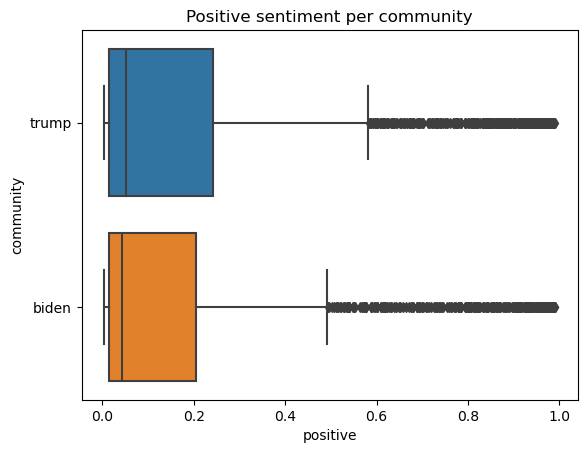

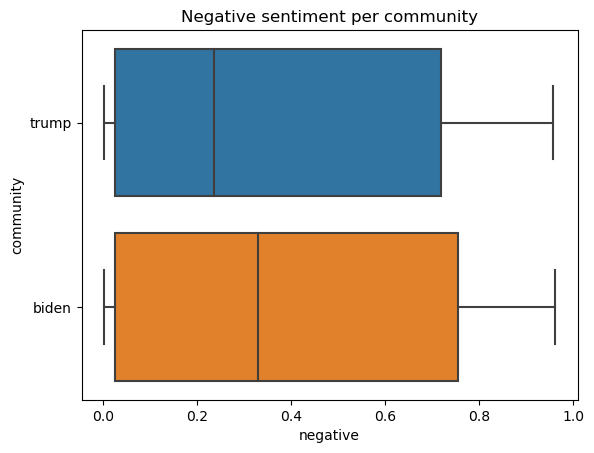

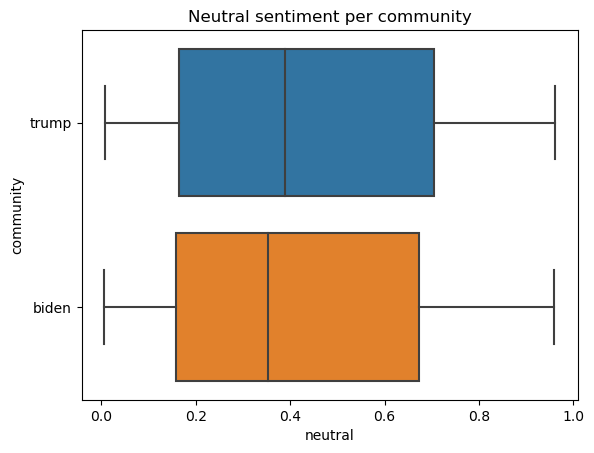

In [12]:
# box plot for positive, negative and neutral in each community
sns.boxplot(y="community", x="positive", data=df).set(
    title="Positive sentiment per community"
)
plt.show()
sns.boxplot(y="community", x="negative", data=df).set(
    title="Negative sentiment per community"
)
plt.show()
sns.boxplot(y="community", x="neutral", data=df).set(
    title="Neutral sentiment per community"
)
plt.show()

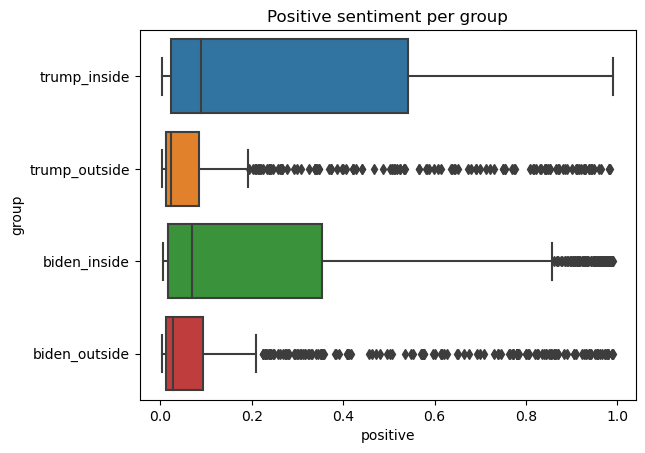

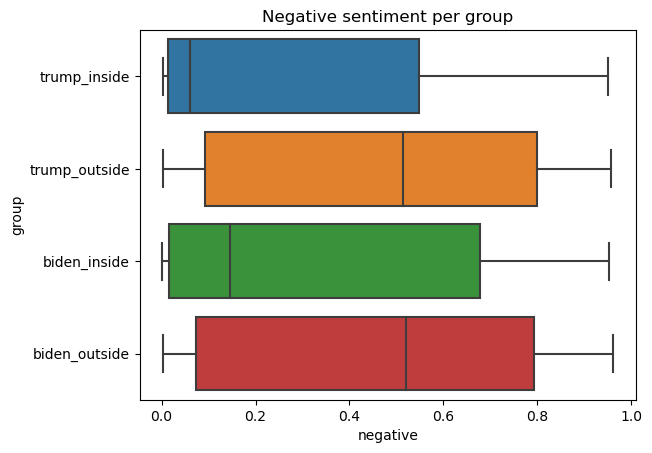

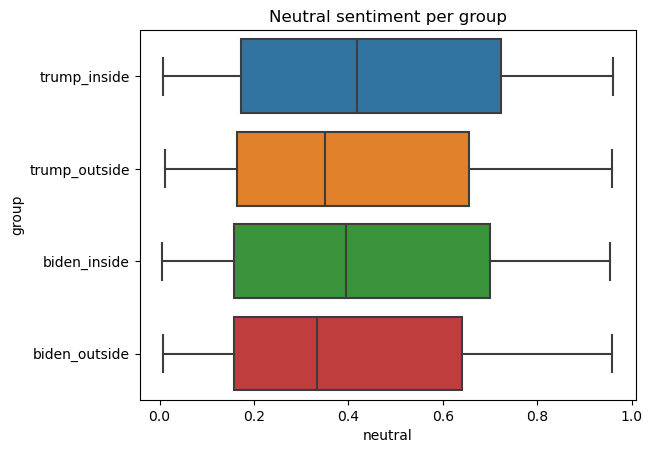

In [13]:
# box plot for positive, negative and neutral in each group
sns.boxplot(y="group", x="positive", data=df).set(
    title="Positive sentiment per group"
)
plt.show()
sns.boxplot(y="group", x="negative", data=df).set(
    title="Negative sentiment per group"
)
plt.show()
sns.boxplot(y="group", x="neutral", data=df).set(
    title="Neutral sentiment per group"
)
plt.show()